# Part II - Investigating Trip Features
## by Zion Oluwasegun

## Investigation Overview

Here, emphasis is laid on frequency, duration and length of trips. Important features are trip lenght, trip duration, dates, start and end times, start and end stations, gender, age group and user types.


## Dataset Overview

This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. It contains 16 columns and 183412 rows which became 25 columns and 174952 rows after cleaning and feature engineering. This projects explores the periods and how often the bike rides/trips are made in the area.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

# Set plotting style
sns.set_theme(style = 'darkgrid')
sns.set_context("paper")
base_colour = sns.color_palette()[-1]

In [2]:
# load in the dataset into a pandas dataframe
df_copy = pd.read_csv('cleaned_bike_data.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Peak times of trip starts and ends over 24 hours.

O=Most Users start their trips by 8AM in the morning, and end it by 5PM in the evening. This is one interesting insight to the data, as we know majority of the Users are most probably white or blue collar workers, or students who set out for work and close around those peak times.


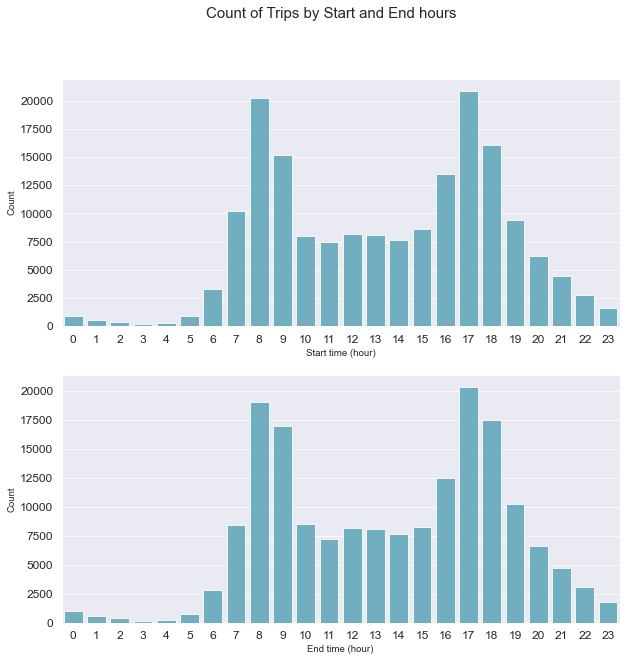

In [3]:
plt.figure(figsize = [10,10])
plt.suptitle('Count of Trips by Start and End hours', fontsize=15)

# For the top plot
plt.subplot(2,1,1)
sns.countplot(data = df_copy, x = 'start_time_hour', color=base_colour);
plt.xlabel('Start time (hour)');
plt.ylabel('Count');
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);

# For the bottom plot
plt.subplot(2,1,2)
sns.countplot(data = df_copy, x = 'end_time_hour', color=base_colour);
plt.xlabel('End time (hour)');
plt.ylabel('Count');
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);

## Trend of trips across the month

Across the months, there are expected dips in number of trips on Saturdays and Sundays, but there are unexpected dips for 2 Wednesdays, [13th](https://www.cbsnews.com/sanfrancisco/news/powerful-atmospheric-river-roars-into-bay-area-mudslides-flooding-torrential-downpours/) and [24th](https://www.mercurynews.com/2019/02/25/atmospheric-river-storm-arrives-in-the-bay-area/#:~:text=Just%20ahead%20of%20an%20%E2%80%9Catmospheric%20river%E2%80%9D%20storm%20that%20is%20expected%20to%20soak%20the%20Bay%20Area%20with%20as%20much%20as%206%20to%208%20inches%20of%20rain%20through%20Wednesday%2C%20light%20precipitation%20began%20falling%20Monday%20morning%20north%20of%20the%20Golden%20Gate%20with%20much%20heavier%20downpours%20expected%20later%20in%20the%20day%20and%20through%20Wednesday.). This is because of the flooding that happended around both dates.

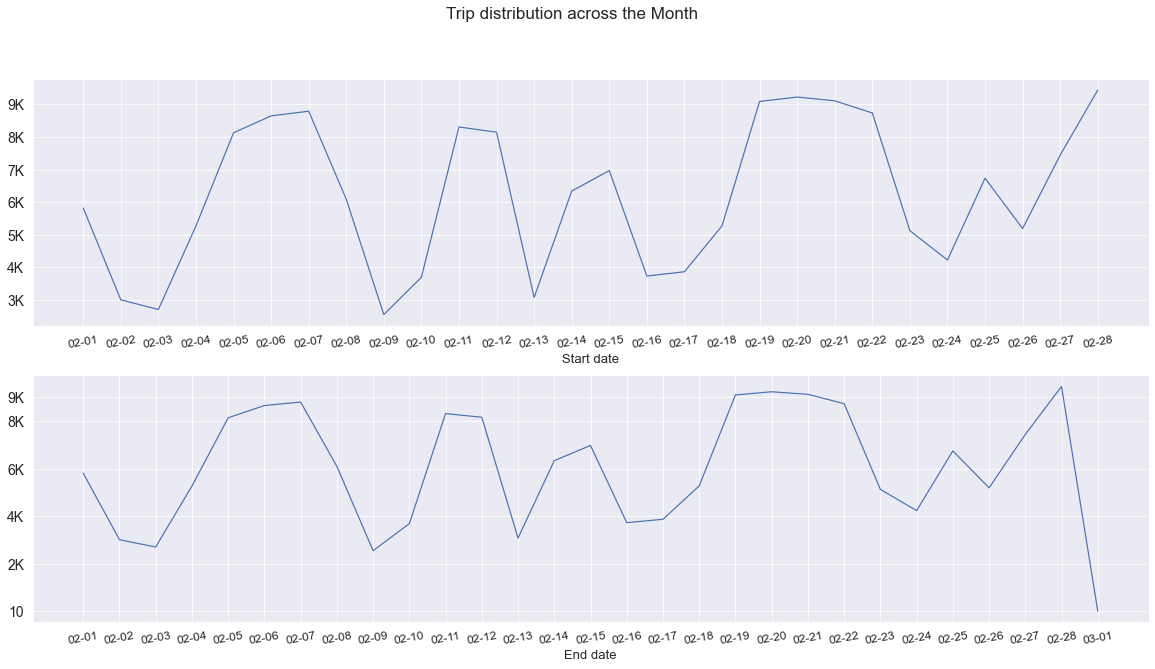

In [4]:
plt.figure(figsize=[20,10])
plt.suptitle('Trip distribution across the Month', fontsize=17);

# For top plot
plt.subplot(2,1,1)
freq = df_copy.start_time_month_date.value_counts().sort_index()
plt.plot(freq.index, freq)
plt.yticks([3000,4000,5000,6000,7000,8000,9000],['3K', '4K','5K','6K','7K', '8K','9K'], fontsize=14)
plt.xticks(rotation=10, fontsize=12);
plt.xlabel('Start date', fontsize=13)

# For bottom plot
plt.subplot(2,1,2)
freq = df_copy.end_time_month_date.value_counts().sort_index()
plt.plot(freq.index, freq)
plt.yticks([10,2000,4000,6000,8000,9000],['10','2K', '4K','6K', '8K', '9K'], fontsize=14)
plt.xticks(rotation=10, fontsize=12);
plt.xlabel('End date', fontsize=13);

## How did those dates affect trips by User type?
For both days, the relative amount of Subscribers that did not take bike trips are more than that of the Customers. This proves that Customers are more likely to stick with the business than Subscribers.


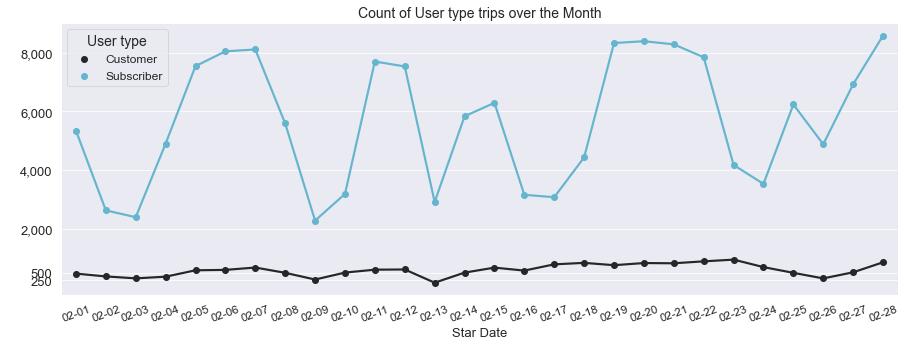

In [5]:
user_type_by_month = df_copy.groupby(['start_time_month_date','user_type']).size().reset_index()
# To plot
plt.figure(figsize=(15,5))
sns.pointplot(data = user_type_by_month, x='start_time_month_date', y=0, hue='user_type', color=base_colour);
plt.yticks([250, 500, 2000,4000,6000,8000],['250', '500','2,000', '4,000', '6,000', '8,000'], fontsize=13);
plt.ylabel(' ');
plt.xticks(rotation=20,fontsize=11.5);
plt.xlabel('Star Date', fontsize=13)
plt.legend(title='User type',title_fontsize=14, fontsize=12, loc=2);
plt.title('Count of User type trips over the Month', fontsize=14);

## Average distance ravelled by Users by demographics.

On average, Females travel longer distances compared to males, wih age group 30-40 averaging the most distance travelled by age group. Interestingly, Customers take longer distances, compared to Subscribers who are way more than Customers. Even though the difference is low, it shouldn't be overlooked.

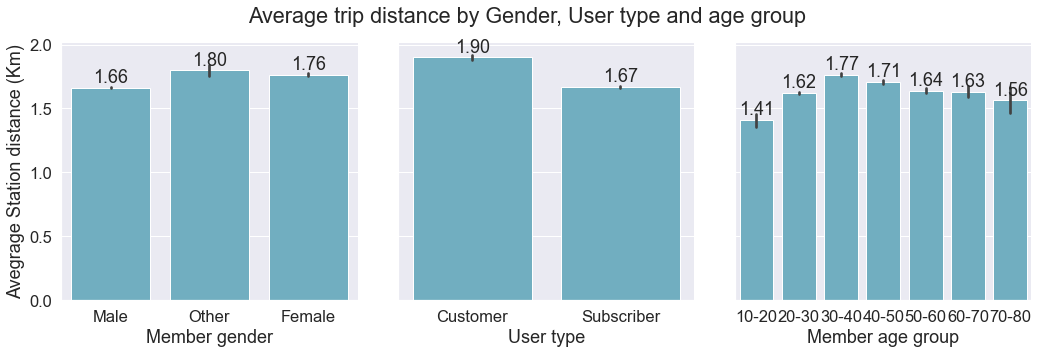

In [6]:
# To reset the age group back to ordinal categorical data
bins= [10,20,30,40,50,60,70,80]
labels = ['10-20','20-30','30-40','40-50','50-60', '60-70','70-80']
df_copy['member_age_group'] = pd.cut(df_copy['member_age'], bins=bins, labels=labels, right=False)
# new data set excluding distance outlier
df_copy_normal_dist = df_copy[df_copy.station_distance_km < 60]

# To plot
sns.set(font_scale=1.5)
g = sns.PairGrid(df_copy_normal_dist, y_vars="station_distance_km",
                 x_vars=["member_gender", "user_type", "member_age_group"],
                 height=5)

g.map(sns.barplot, color=base_colour);
g.fig.suptitle('Average trip distance by Gender, User type and age group')
g.fig.subplots_adjust(top=0.88)
g.axes[0,0].yaxis.set_label_text('Avegrage Station distance (Km)')
g.axes[0,0].xaxis.set_label_text('Member gender')
g.axes[0,1].xaxis.set_label_text('User type')
g.axes[0,2].xaxis.set_label_text('Member age group')

# For annotations
for ax in g.axes.ravel():
  for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

## Average time, in hours, trips by Users by demographics.

Oher Gender significantly spend more time on the road compared to Males and Females. Customers probably have the luxury of staying longer with the bikes, because averagely, they spend more time on trips han Subscribers. Across age groups, the average time spent on trips is roughly the same; 0.19 - 0.23 hours.

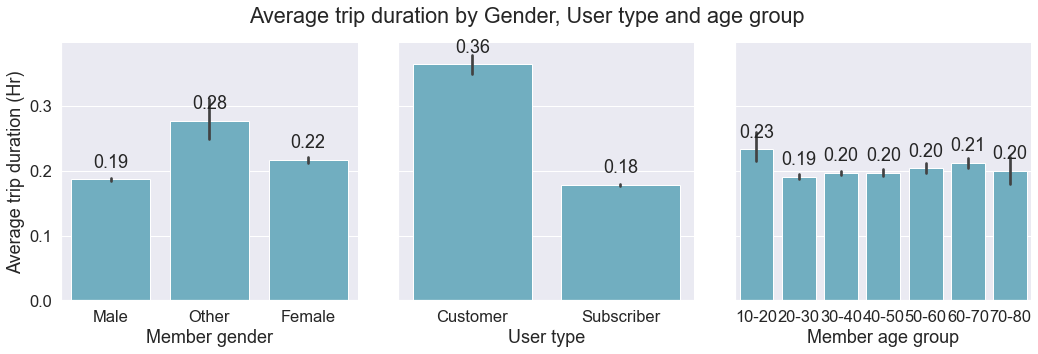

In [7]:
g = sns.PairGrid(df_copy, y_vars="duration_hour",
                 x_vars=["member_gender", "user_type", "member_age_group"],
                 height=5)
g.map(sns.barplot, color=base_colour)
g.fig.suptitle('Average trip duration by Gender, User type and age group')
g.fig.subplots_adjust(top=0.88)
g.axes[0,0].yaxis.set_label_text('Average trip duration (Hr)')
g.axes[0,0].xaxis.set_label_text('Member gender')
g.axes[0,1].xaxis.set_label_text('User type')
g.axes[0,2].xaxis.set_label_text('Member age group')

# For annotations
for ax in g.axes.ravel():
  for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 17), textcoords = 'offset points')

## What are the most used docking stations?

Majority of the most used docking staions are in/around [Market Sreet](https://en.wikipedia.org/wiki/Market_Street_(San_Francisco)). This area is the city's premier shopping and entertainment district containing the largest number of upscale department stores, chic boutiques, art galleries and theaters in the city. [(Source)](https://www.tripadvisor.com/Attraction_Review-g60713-d144424-Reviews-Market_Street-San_Francisco_California.html)

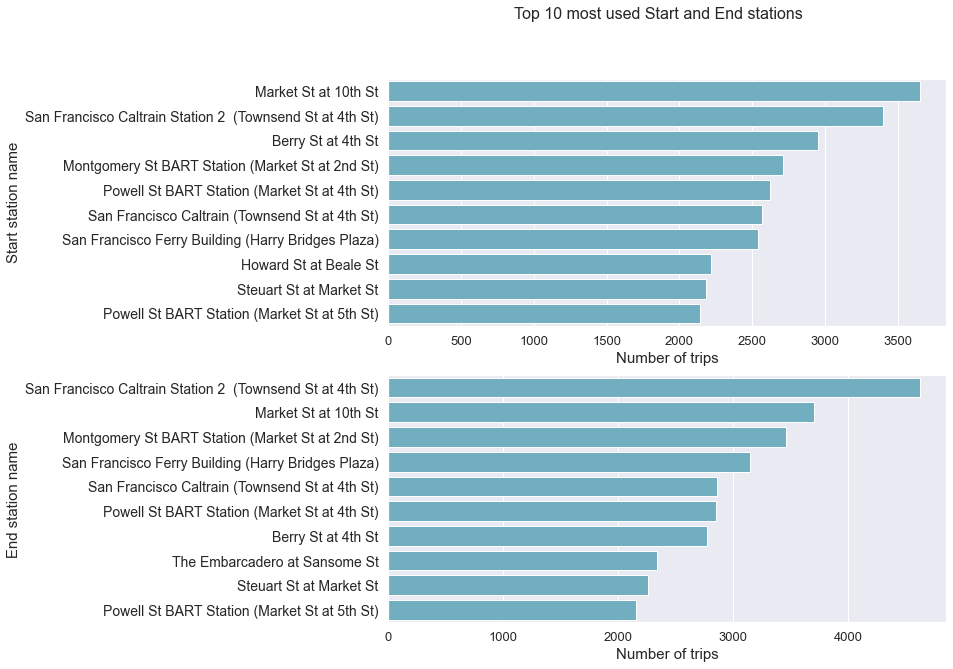

In [8]:
# Filter top 10 used stations for start and end trips
top_start_vc = df_copy.start_station_name.value_counts().head(10)
end_start_vc = df_copy.end_station_name.value_counts().head(10)

# Create dataframe of most used stations
top_start = df_copy[df_copy['start_station_name'].isin(top_start_vc.index)]
top_end = df_copy[df_copy['end_station_name'].isin(end_start_vc.index)]

# To plot
plt.figure(figsize=(10,10))
plt.suptitle('Top 10 most used Start and End stations', fontsize=16 );

# For plot on top
plt.subplot(2,1,1)
sns.countplot(data=top_start, y='start_station_name', color=base_colour, order= top_start_vc.index);
plt.ylabel('Start station name', fontsize=15)
plt.xlabel('Number of trips', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=14)

# For plot at the bottom
plt.subplot(2,1,2)
sns.countplot(data=top_end, y='end_station_name', color=base_colour, order= end_start_vc.index);
plt.ylabel('End station name', fontsize=15)
plt.xlabel('Number of trips', fontsize=15);
plt.yticks(fontsize=14)
plt.xticks(fontsize=13);